In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.seterr(divide = 'ignore', invalid = "ignore") 

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [66]:
# Load in all the results
df_op = pd.read_csv("Results/safe/OP-ML_save.csv")
df_vp = pd.concat([pd.read_csv("Results/safe/VP-RC_save.csv"), pd.read_csv("Results/safe/VP-MP_save.csv")])
df_tp = pd.concat([pd.read_csv("Results/safe/TP-RC_save.csv"), pd.read_csv("Results/safe/TP-MP_save.csv")])

dfs = [df_op, df_vp, df_tp]

# Create a log10 version for all required data points
for df in dfs:
    df.loc[df["method_time"] == -1, "trace_time"] = np.nan
    df.loc[df["trace_time"] == -1, "trace_time"] = np.nan
    
    df["3th_power_multi_states"] = df["multi_states"]**3
    
    df["log_traces"] = np.log10(df["traces"])
    
    df["log_power_multi_states"] = np.log10(df["3th_power_multi_states"])
    
    df["log_method_time"] = np.log10(df["method_time"])
    df.loc[df["method_time"] == 0, "log_method_time"] = min(df["log_method_time"])
    
    df["log_trace_time"] = np.log10(df["trace_time"])
    df.loc[df["trace_time"] == 0, "log_trace_time"] = min(df["log_trace_time"])

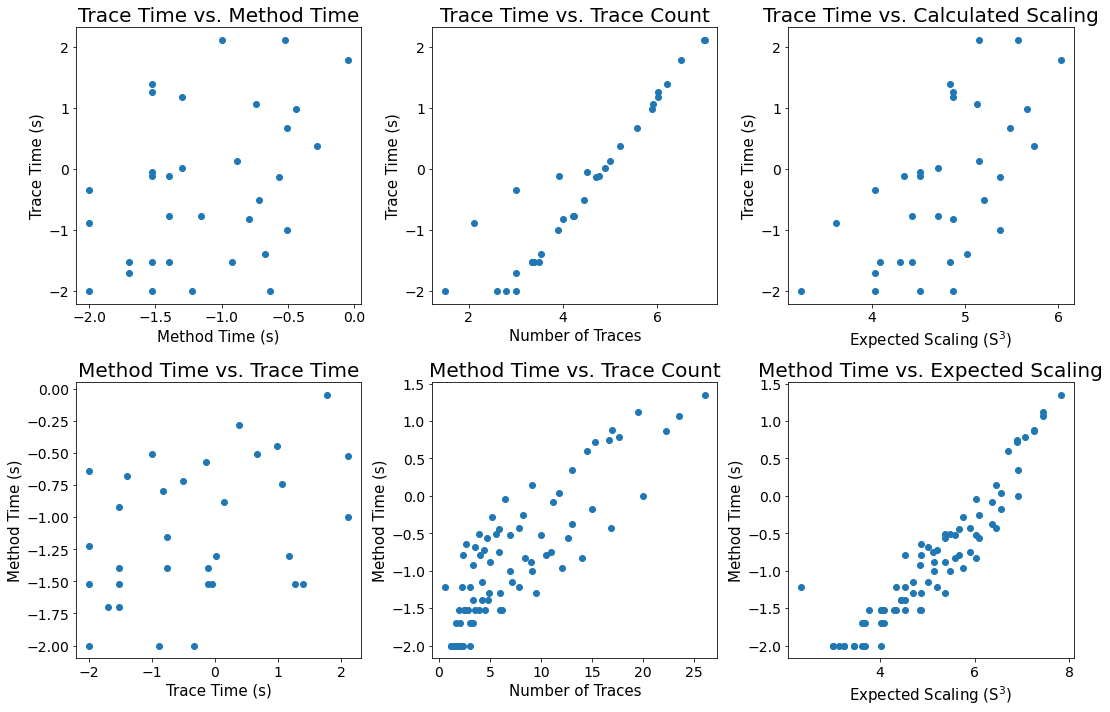

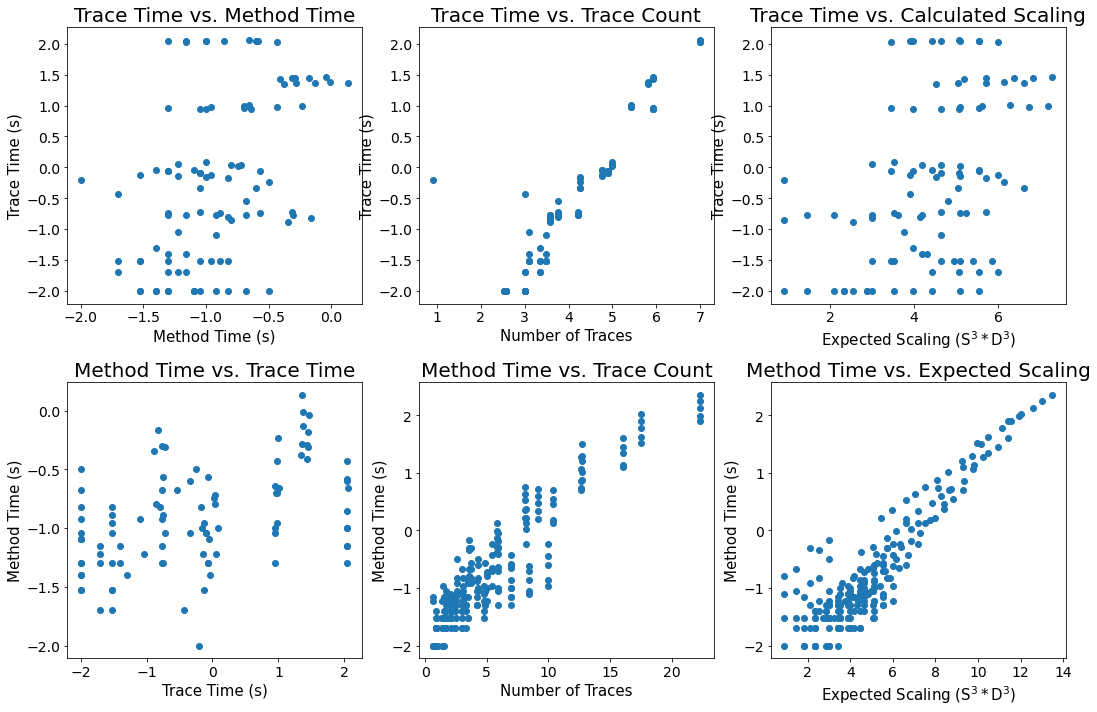

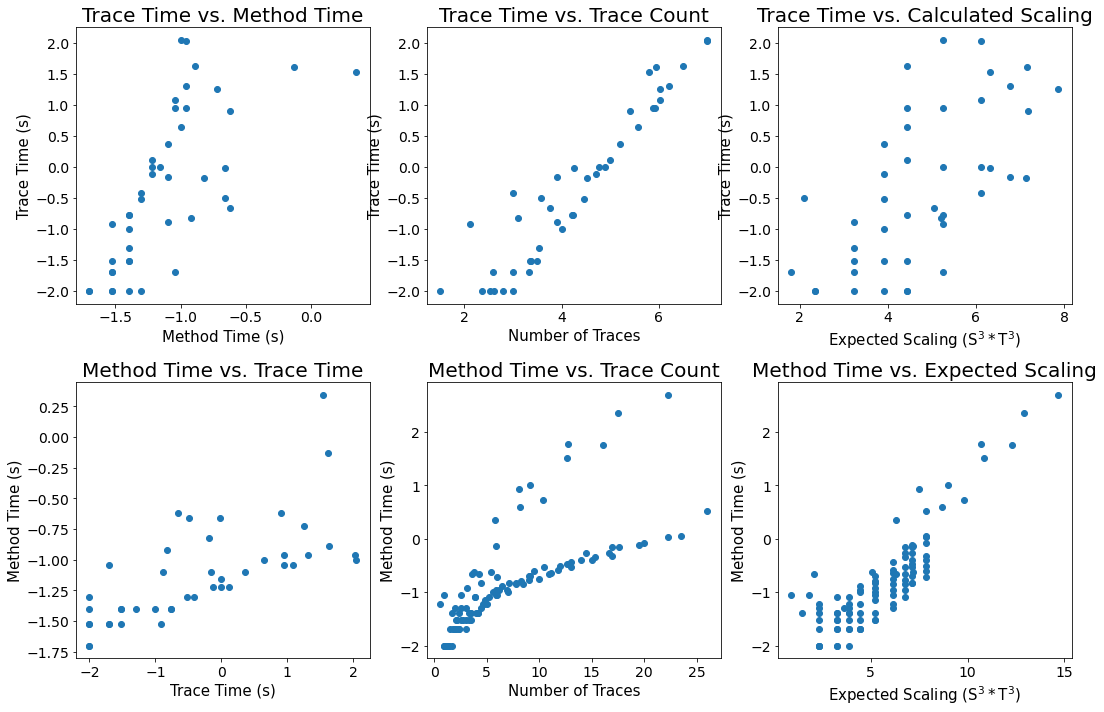

In [133]:
# Create a set of 6 graphs for each of the three functions
to_do = [[df_op, "$\mathregular{S^3}$", "OUTCOME_PROB_results"],
         [df_vp, "$\mathregular{S^3 * D^3}$", "VERIFY_PROB_results"],
         [df_tp, "$\mathregular{S^3 * T^3}$", "TRACE_PROB_results"]]

for do in to_do:

    cur_df, calc, file_name = do
    
    figure, axis = plt.subplots(2, 3) 
    figure.set_figheight(10)
    figure.set_figwidth(15)

    # trace time vs. method time
    axis[0, 0].scatter(cur_df["log_method_time"], cur_df["log_trace_time"]) 
    axis[0, 0].set_title("Trace Time vs. Method Time", size = 20)
    axis[0, 0].set_xlabel("Method Time (s)", size=15)
    axis[0, 0].set_ylabel("Trace Time (s)", size=15)
    axis[0, 0].tick_params(axis='x', labelsize=14)
    axis[0, 0].tick_params(axis='y', labelsize=14)

    # trace time vs. traces
    axis[0, 1].scatter(cur_df["log_traces"], cur_df["log_trace_time"]) 
    axis[0, 1].set_title("Trace Time vs. Trace Count", size = 20)
    axis[0, 1].set_xlabel("Number of Traces", size=15)
    axis[0, 1].set_ylabel("Trace Time (s)", size=15)
    axis[0, 1].tick_params(axis='x', labelsize=14)
    axis[0, 1].tick_params(axis='y', labelsize=14)


    # trace time vs. multi-states
    axis[0, 2].scatter(cur_df["log_power_multi_states"], cur_df["log_trace_time"]) 
    axis[0, 2].set_title("Trace Time vs. Calculated Scaling", size = 20)
    axis[0, 2].set_xlabel(f"Expected Scaling ({calc})", size=15)
    axis[0, 2].set_ylabel("Trace Time (s)", size=15)
    axis[0, 2].tick_params(axis='x', labelsize=14)
    axis[0, 2].tick_params(axis='y', labelsize=14)

    # method time vs. trace_time
    axis[1, 0].scatter(cur_df["log_trace_time"], cur_df["log_method_time"], ) 
    axis[1, 0].set_title("Method Time vs. Trace Time", size = 20)
    axis[1, 0].set_xlabel("Trace Time (s)", size=15)
    axis[1, 0].set_ylabel("Method Time (s)", size=15)
    axis[1, 0].tick_params(axis='x', labelsize=14)
    axis[1, 0].tick_params(axis='y', labelsize=14)

    # method time vs. traces
    axis[1, 1].scatter(cur_df["log_traces"], cur_df["log_method_time"]) 
    axis[1, 1].set_title("Method Time vs. Trace Count", size = 20)
    axis[1, 1].set_xlabel("Number of Traces", size=15)
    axis[1, 1].set_ylabel("Method Time (s)", size=15)
    axis[1, 1].tick_params(axis='x', labelsize=14)
    axis[1, 1].tick_params(axis='y', labelsize=14)


    # method time vs. multi-states
    axis[1, 2].scatter(cur_df["log_power_multi_states"], cur_df["log_method_time"]) 
    axis[1, 2].set_title("Method Time vs. Expected Scaling", size = 20)
    axis[1, 2].set_xlabel(f"Expected Scaling ({calc})", size=15)
    axis[1, 2].set_ylabel("Method Time (s)", size=15)
    axis[1, 2].tick_params(axis='x', labelsize=14)
    axis[1, 2].tick_params(axis='y', labelsize=14)

    figure.tight_layout()
    plt.savefig(f"Results\\{file_name}")